In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
#import the data set
df = pd.read_csv('data_cleaning_challenge.csv',encoding ='ISO-8859-1')

In [3]:
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


## 1.Remove unnecessary column and indexes

In [4]:
#remove PMID/PMCID column as it is not needed and has NaN values
df.drop('PMID/PMCID', axis='columns', inplace=True)
df.head()

,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [5]:
#column head of cost is too long, so change it
df.rename(columns = {'COST (£) charged to Wellcome (inc VAT when charged)' : 'Cost'},inplace = True)

In [6]:
#look up for any NaN values
df.isnull().any()

Publisher        False
Journal title     True
Article title    False
Cost             False
dtype: bool

In [7]:
df.loc[df['Journal title'].isnull()]

,Publisher,Journal title,Article title,Cost
986,MacMillan,NaN,Fungal Disease in Britain and the United State...,£13200.00


In [8]:
#replace the NaN value with str
df.dropna(axis = 0, inplace = True, how = 'any')


In [9]:
df.loc[df['Publisher']=='MacMillan']


,Publisher,Journal title,Article title,Cost


## 2. Check the cost column if indexes are float 

In [10]:
df.Cost.dtype

dtype('O')

In [11]:
#change indexes in cost column to float
df['Cost'] = df['Cost'].astype(str).str.replace('£','').str.replace('$','')
df['Cost'] = df['Cost'].astype(np.float)
df.Cost.dtype

dtype('float64')

In [12]:
#finding if there is any extreme values
df[df.Cost == 0]
df[df.Cost == 999999]

,Publisher,Journal title,Article title,Cost
149,ASBMB,Journal of Biological Chemistry,Picomolar nitric oxide signals from central ne...,999999.0
227,BioMed Central,BMC Genomics.,"Phenotypic, genomic, and transcriptional chara...",999999.0
277,BMC,Trials,Community resource centres to improve the heal...,999999.0
358,Cambridge University Press,Expert Reviews in Molecular Medicine,Pharmacological targets in the ubiquitin syste...,999999.0
404,Company of Biologists,Journal of Cell Science,PKA isoforms coordinate mRNA fate during nutri...,999999.0
410,CUP,Journal of the International African Institute,"Pharmacy, money and public health in Dakar.",999999.0
491,Elsevier,Cell,piRNAs can trigger a multigenerational epigene...,999999.0
560,Elsevier,Experimental Cell Research,Perturbation of invadolysin disrupts cell migr...,999999.0
630,Elsevier,Journal of paediatric Urology,Persistent unexplained congenital clitoromegal...,999999.0
660,Elsevier,Molecluar & Cellular Endocrinology,Periconceptional changes in maternal exposure ...,999999.0


In [13]:
#drop all extreme values
df = df[df.Cost != 0]
df = df[df.Cost != 999999]
df[df.Cost == 0]
df[df.Cost == 999999]

,Publisher,Journal title,Article title,Cost


## 3. Clean up any misleading alphabet in Journal title

In [39]:
#count unique journal title
df['Journal title'].value_counts()

PLoS One                                                                90
PLoS ONE                                                                59
Journal of Biological Chemistry                                         47
Nucleic Acids Research                                                  21
Proceedings of the National Academy of Sciences                         19
PLoS Neglected Tropical Diseases                                        18
Human Molecular Genetics                                                17
Nature Communications                                                   16
Neuroimage                                                              15
Brain                                                                   14
BMC Public Health                                                       14
NeuroImage                                                              14
PLoS Genetics                                                           13
PLoS Pathogens           

In [40]:
#some names are the same but with different capitalization
#clean up the white spaces and only capitalize the first letter
df['Journal title'] = df['Journal title'].str.lower()
df['Journal title'] = df['Journal title'].str.strip()
df['Journal title'] = df['Journal title'].str.title()
df['Journal title'].value_counts()

Plos One                                                      183
Journal Of Biological Chemistry                                52
Neuroimage                                                     29
Nucleic Acids Research                                         26
Plos Genetics                                                  22
Plos Pathogens                                                 22
Proceedings Of The National Academy Of Sciences                22
Plos Neglected Tropical Diseases                               20
Human Molecular Genetics                                       18
Nature Communications                                          18
Movement Disorders                                             15
Brain                                                          14
Bmc Public Health                                              14
Journal Of Neuroscience                                        13
Biochemical Journal                                            12
Developmen

In [41]:
#do the same thing to article title
df['Article title'] = df['Article title'].str.lower()
df['Article title'] = df['Article title'].str.strip()
df['Article title'] = df['Article title'].str.title()
df['Article title'].value_counts()

Exclusive Breastfeeding, Diarrhoel Morbidity And All-Couse Mortality In Infnats Of Hiv Infected                                                                                                             2
Bivalent Promoter Marks And A Latent Enhancer May Prime The Leukaemia Oncogene Lmo1 For Ectopic Expression In T-Cell Leukaemia                                                                              1
Childhood Conduct Disorder Trajectories, Prior Risk Factors And Cannabis Use At Age 16: Birth Cohort Study                                                                                                  1
Adding Value? : Eu Governance Of Organ Donation And Transplantation                                                                                                                                         1
Mannosylation In Candida Albicans: Role In Cell Wall Function And Immune Recognition.                                                                                           

## 4.determine the five most common journals and the total articles for each

In [42]:
#find the topfive commonjournals
topfive = df['Journal title'].value_counts()[:5]
print(topfive)

Plos One                           183
Journal Of Biological Chemistry     52
Neuroimage                          29
Nucleic Acids Research              26
Plos Genetics                       22
Name: Journal title, dtype: int64


Text(0, 0.5, 'Counts')

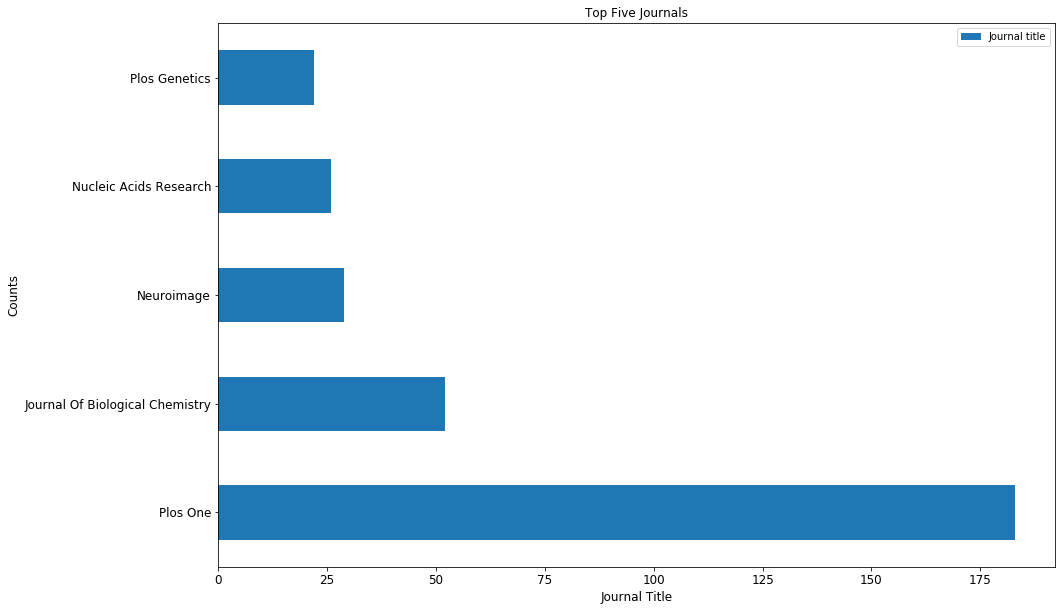

In [43]:
ax = topfive.plot(kind='barh', title ="Top Five Journals", figsize=(15, 10), legend=True, fontsize=12)
#label each axis
ax.set_xlabel("Journal Title", fontsize=12)
ax.set_ylabel("Counts", fontsize=12)

In [44]:
#find the total articles for each journal
df.groupby(['Journal title']).agg({'Article title' : 'count'})

,Article title
Journal title,
Academy Of Nutrition And Dietetics,1
Acs Chemical Biology,5
Acs Chemical Neuroscience,1
Acs Nano,2
"Acta Crystallographica Section D, Biological Crystallography",1
Acta Crystallographica Section D: Biological Crystallography,1
Acta Crystallographica Section F: Structural Biology And Crystallization Communications,2
"Acta Crystallographica, Section D",1
Acta Crystallography D,1


In [45]:
#find the statistics by Journal title
df.groupby(['Journal title']).describe()

Cost               \
                                                   count         mean   
Journal title                                                           
Academy Of Nutrition And Dietetics                   1.0  2379.540000   
Acs Chemical Biology                                 5.0  1418.186000   
Acs Chemical Neuroscience                            1.0  1186.800000   
Acs Nano                                             2.0   668.140000   
Acta Crystallographica Section D,  Biological C...   1.0   771.420000   
Acta Crystallographica Section D: Biological Cr...   1.0   773.740000   
Acta Crystallographica Section F: Structural Bi...   2.0   796.635000   
Acta Crystallographica, Section D                    1.0   757.180000   
Acta Crystallography D                               1.0   774.190000   
Acta D                                               1.0   750.160000   
Acta Dermato Venereologica                           1.0   653.960000   
Acta Diabetologica                                   1.0  2336.280000   
Acta F                                               1.0   754.900000   
Acta Neuropathol                                     1.0  1901.040000   
Acta Neuropathologica                                3.0  2161.063333   
Acta Opthalmologica                                  1.0  2270.160000   
Acta Physiol                                         1.0  1991.500000   
Addiction                                            2.0  2136.225000   
Advances In Experimental Medicine And Biology        4.0  1928.457500   
Age                                                  2.0  2170.140000   
Age And Ageing                                       1.0  2040.000000   
Ageing & Society                                     1.0  1695.000000   
Aging Cell                                           1.0  1970.570000   
Aids                                                 3.0  2059.306667   
Aids Behav                                           1.0  1834.770000   
Aids Care                                            4.0  2294.225000   
Aids Journal                                         1.0  2015.720000   
Aids Research And Therapy                            1.0  1240.000000   
Aids Uk                                              2.0  1836.920000   
Alcohol And Alcoholism                               1.0  2040.000000   
...                                                  ...          ...   
Tissue Engineering: Part A                           1.0  1741.320000   
Traffic                                              6.0  2129.338333   
Transactions Of The Royal Society Of Tropical M...   1.0  1524.080000   
Translational Psychiatry                             2.0  2880.000000   
Trends In Cognitive Science                          1.0  2340.630000   
Trends In Genetics                                   2.0  2370.935000   
Trends In Microbiology                               1.0  2291.330000   
Trends In Molecular Medicine                         1.0  2248.330000   
Trends In Neuroscience                               1.0  2402.810000   
Trends In Neurosciences                              1.0  2426.960000   
Trends In Parasitology                               3.0  2257.653333   
Trials                                               4.0  1200.475000   
Trop Med Int Health                                  1.0  1834.770000   
Tropical Animal Health & Production                  1.0  2054.780000   
Tropical Medicine And International Health           6.0  1843.163333   
Tuberculosis                                         2.0  2161.255000   
Urban History                                        1.0  2034.000000   
Urolithiasis                                         1.0  1112.400000   
Vaccine                                              5.0  1623.394000   
Vascular Pharmacology                                1.0  2352.530000   
Veterinary Microbiology                              1.0  2451.490000   
Veterinary Parasitology              

In [46]:
#find the median 
df.groupby(['Journal title']).median()

,Cost
Journal title,
Academy Of Nutrition And Dietetics,2379.540
Acs Chemical Biology,1294.590
Acs Chemical Neuroscience,1186.800
Acs Nano,668.140
"Acta Crystallographica Section D, Biological Crystallography",771.420
Acta Crystallographica Section D: Biological Crystallography,773.740
Acta Crystallographica Section F: Structural Biology And Crystallization Communications,796.635
"Acta Crystallographica, Section D",757.180
Acta Crystallography D,774.190
